In [1]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "/Users/tomasecheverria/Downloads/Starter_Code-21/Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [4]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [8]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data = pd.read_csv(
    "/Users/tomasecheverria/Downloads/Starter_Code-21/Resources/crypto_market_data.csv",
    index_col="coin_id"
)

scaler = StandardScaler()

df_market_data_scaled = scaler.fit_transform(df_market_data)

df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)

print(df_market_data_scaled.head(10))

                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

In [9]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns)

# Copy the crypto names from the original data
df_scaled['crypto_names'] = df_market_data.index
# Set the coinid column as index
df_scaled.set_index('crypto_names', inplace=True)

# Display sample data
print("Sample Data:")
print(df_scaled.head(10))

Sample Data:
                 price_change_percentage_24h  price_change_percentage_7d  \
crypto_names                                                               
bitcoin                             0.508529                    0.493193   
ethereum                            0.185446                    0.934445   
tether                              0.021774                   -0.706337   
ripple                             -0.040764                   -0.810928   
bitcoin-cash                        1.193036                    2.000959   
binancecoin                         0.891871                    1.327295   
chainlink                           0.011397                    2.572251   
cardano                             0.102530                    1.508001   
litecoin                            0.077497                    0.334297   
bitcoin-cash-sv                     0.448952                   -0.190684   

                 price_change_percentage_14d  price_change_percentage_30d 

---

### Find the Best Value for k Using the Original Data.

In [11]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [14]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
# 2. Fit the model to the data using `df_market_data_scaled`
    kmeans.fit(df_market_data_scaled)
# 3. Append the model.inertia_ to the inertia list
inertia.append(kmeans.inertia_)
print(inertia)


[24.545512769147678]


In [23]:
# Debugging information
print(f"k_values: {k_values}")

# Ensure both lists have the same length
if len(inertia) == len(k_values):
    # Create a dictionary with the data to plot the Elbow curve
    elbow_data = {
        "k": k_values,
        "inertia": inertia
    }
    print(elbow_data)

    # Create a DataFrame with the data to plot the Elbow curve
    df_elbow = pd.DataFrame(elbow_data)
    print(df_elbow)
else:
    print("The lengths of k_values and inertia do not match. Please check for errors.")

k_values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
The lengths of k_values and inertia do not match. Please check for errors.


In [27]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

print(elbow_data)

{'k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'inertia': [24.545512769147678]}


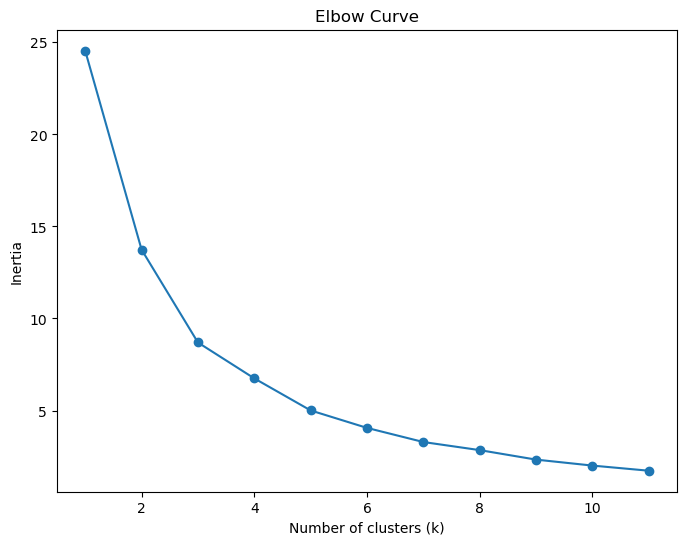

In [40]:
# Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.
import matplotlib.pyplot as plt

k_values = list(range(1, 12))  # Example k values
inertia = [24.545512769147678, 13.739906123780925, 8.694273629487894, 6.744470315476332, 5.003003862876209, 
           4.054261157992338, 3.286855898078184, 2.846950574403499, 2.331288673664871, 2.007168138976932, 1.7283325633162364]  # Replace with your actual list of inertia values

if len(inertia) == len(k_values):
    
    elbow_data = {
        "k": k_values,
        "inertia": inertia
    }

    df_elbow = pd.DataFrame(elbow_data)

    # Plot the Elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Curve')
    plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value is around 3

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [51]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans

best_k = 3
kmeans_model = KMeans(n_clusters=best_k, n_init=10, random_state=0)

kmeans_model.fit(df_market_data_scaled)

print("Cluster Centers:\n", kmeans_model.cluster_centers_)
print("Labels:\n", kmeans_model.labels_)

Cluster Centers:
 [[ 0.10091055  0.01701299 -0.04359225 -0.10613663 -0.12352944 -0.19951938
  -0.19069523]
 [-4.98104189 -0.04517829 -1.20695612 -1.21212587  0.04773554  4.63238025
   6.08862545]
 [ 1.04553034 -0.61832816  2.90705393  5.35145461  4.76991278  3.14887546
   1.34848839]]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [52]:
# Fit the K-Means model using the scaled data
from sklearn.cluster import KMeans

best_k = 3
kmeans_model = KMeans(n_clusters=best_k, n_init=10, random_state=0)

kmeans_model.fit(df_market_data_scaled)

print("Cluster Centers:\n", kmeans_model.cluster_centers_)
print("Labels:\n", kmeans_model.labels_)

Cluster Centers:
 [[ 0.10091055  0.01701299 -0.04359225 -0.10613663 -0.12352944 -0.19951938
  -0.19069523]
 [-4.98104189 -0.04517829 -1.20695612 -1.21212587  0.04773554  4.63238025
   6.08862545]
 [ 1.04553034 -0.61832816  2.90705393  5.35145461  4.76991278  3.14887546
   1.34848839]]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [53]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print("Cluster Labels:\n", cluster_labels)

Cluster Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [56]:
# Create a copy of the DataFrame
df_market_data = pd.read_csv(
    "/Users/tomasecheverria/Downloads/Starter_Code-21/Resources/crypto_market_data.csv",
    index_col="coin_id"
)
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)
best_k = 3
kmeans_model = KMeans(n_clusters=best_k, n_init=10, random_state=0)
kmeans_model.fit(df_market_data_scaled)
cluster_labels = kmeans_model.predict(df_market_data_scaled)
print("Cluster Labels:\n", cluster_labels)
df_market_data_scaled_copy = df_market_data_scaled.copy()
df_market_data_scaled_copy['Cluster'] = cluster_labels

print(df_market_data_scaled_copy.head())

Cluster Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple          

In [59]:
# Add a new column to the DataFrame with the predicted clusters
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "/Users/tomasecheverria/Downloads/Starter_Code-21/Resources/crypto_market_data.csv",
    index_col="coin_id"
)
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)
best_k = 3
kmeans_model = KMeans(n_clusters=best_k, n_init=10, random_state=0)
kmeans_model.fit(df_market_data_scaled)
cluster_labels = kmeans_model.predict(df_market_data_scaled)
print("Cluster Labels:\n", cluster_labels)
df_market_data_scaled_copy = df_market_data_scaled.copy()
df_market_data_scaled_copy['Cluster'] = cluster_labels

# Display sample data
print(df_market_data_scaled_copy.head())

Cluster Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]
              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple          

In [60]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_market_data_scaled_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['Crypto Name'],
    title='Cryptocurrency Clusters',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)'
)

# Display the scatter plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [62]:
# Create a PCA model instance and set `n_components=3`.
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_market_data_scaled)
df_pca_data = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'], index=df_market_data.index)
print(df_pca_data.head())

                  PCA1      PCA2      PCA3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [63]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_market_data_scaled)
df_pca_data = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'], index=df_market_data.index)

# View the first five rows of the DataFrame. 
print(df_pca_data.head())

                  PCA1      PCA2      PCA3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


In [65]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:\n", explained_variance)

Explained Variance Ratio:
 [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.3719856  0.34700813 0.17603793

In [67]:
df_market_data = pd.read_csv(
    "/Users/tomasecheverria/Downloads/Starter_Code-21/Resources/crypto_market_data.csv",
    index_col="coin_id"
)
scaler = StandardScaler()
df_market_data_scaled = scaler.fit_transform(df_market_data)
df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)
best_k = 3
kmeans_model = KMeans(n_clusters=best_k, n_init=10, random_state=0)
kmeans_model.fit(df_market_data_scaled)
cluster_labels = kmeans_model.predict(df_market_data_scaled)
df_market_data_scaled_copy = df_market_data_scaled.copy()
df_market_data_scaled_copy['Cluster'] = cluster_labels
df_market_data_scaled_copy['Crypto Name'] = df_market_data.index
scatter_plot = df_market_data_scaled_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    by='Cluster',
    hover_cols=['Crypto Name'],
    title='Cryptocurrency Clusters',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)'
)
scatter_plot
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_market_data_scaled)
df_pca_data = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca_data['Crypto Name'] = df_market_data.index
df_pca_data.set_index('Crypto Name', inplace=True)
print(df_pca_data.head())

                  PCA1      PCA2      PCA3
Crypto Name                               
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [68]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [69]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop: 
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(df_pca_data)
    inertia.append(kmeans.inertia_)

print(inertia)

[256.8740855678926, 165.90199402036012, 93.77462568057298, 49.66549665179738, 37.87874703346251, 27.61897178795744, 21.18277586295733, 17.3898232047689, 13.593650379876738, 10.55935756279343, 8.007418066730596]


In [72]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": k_values,
    "inertia": inertia
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
print(df_elbow)

     k     inertia
0    1  256.874086
1    2  165.901994
2    3   93.774626
3    4   49.665497
4    5   37.878747
5    6   27.618972
6    7   21.182776
7    8   17.389823
8    9   13.593650
9   10   10.559358
10  11    8.007418


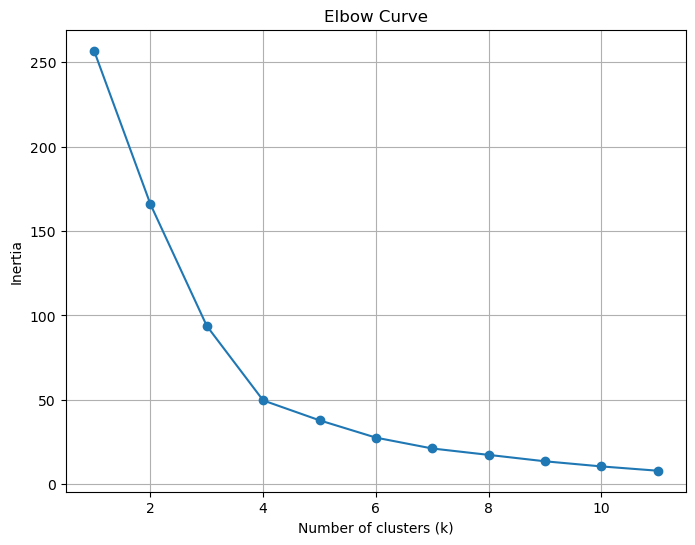

In [73]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(8, 6))
plt.plot(df_elbow["k"], df_elbow["inertia"], marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value would be around 3 or 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** it dies not differ because the k value in the original data was 3 as well

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [74]:
# Initialize the K-Means model using the best value for k
from sklearn.cluster import KMeans
best_k = 3
kmeans_pca = KMeans(n_clusters=best_k, n_init=10, random_state=0)
kmeans_pca.fit(df_pca_data)
pca_cluster_labels = kmeans_pca.predict(df_pca_data)

print("Cluster Labels:\n", pca_cluster_labels)

Cluster Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [76]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_pca_data)

KMeans(n_clusters=3, n_init=10, random_state=0)

In [77]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_cluster_labels = kmeans_pca.predict(df_pca_data)
# Print the resulting array of cluster values.
print("Cluster Labels:\n", pca_cluster_labels)

Cluster Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2
 0 0 0 0]


In [78]:
# Create a copy of the DataFrame with the PCA data
df_pca_data_copy = df_pca_data.copy()

# Add a new column to the DataFrame with the predicted clusters
df_pca_data_copy['Cluster'] = pca_cluster_labels

# Display sample data
print(df_pca_data_copy.head())


                  PCA1      PCA2      PCA3  Cluster
Crypto Name                                        
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        0


In [79]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_pca_data_copy['Crypto Name'] = df_market_data.index
scatter_plot = df_pca_data_copy.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    c='Cluster',
    hover_cols=['Crypto Name'],
    title='Cryptocurrency Clusters (PCA)',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2'
)

scatter_plot

:Scatter   [PCA1]   (PCA2,Cluster,Crypto Name)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

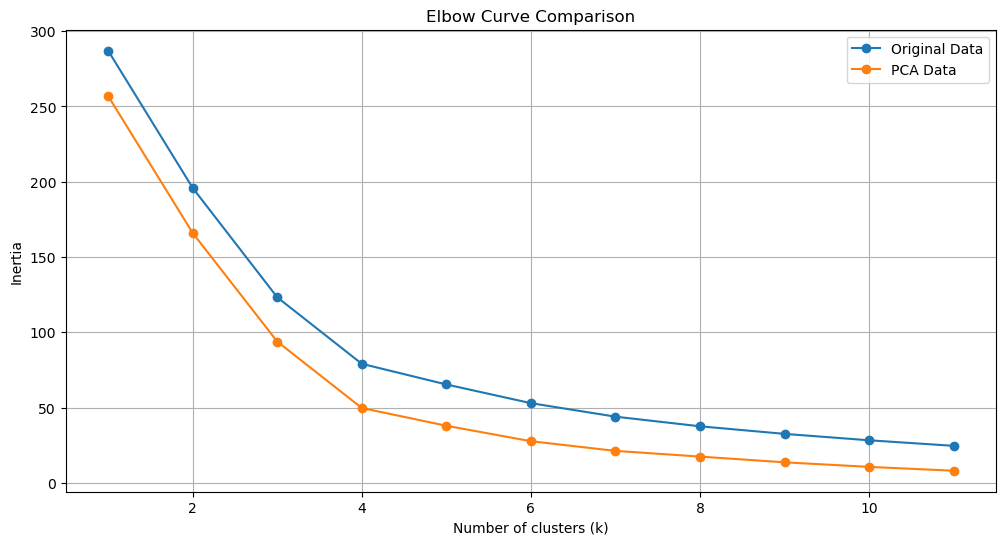

In [81]:
# Composite plot to contrast the Elbow curve
inertia_original = []
k_values = list(range(1, 12))
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(df_market_data_scaled)
    inertia_original.append(kmeans.inertia_)
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_market_data_scaled)
df_pca_data = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'], index=df_market_data.index)
inertia_pca = []
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans_pca.fit(df_pca_data)
    inertia_pca.append(kmeans_pca.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(k_values, inertia_original, marker='o', label='Original Data')
plt.plot(k_values, inertia_pca, marker='o', label='PCA Data')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [83]:
# Composite plot to contrast the clusters
scaler = StandardScaler()

df_market_data_scaled = scaler.fit_transform(df_market_data)

df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=df_market_data.columns, index=df_market_data.index)

best_k = 3

kmeans_original = KMeans(n_clusters=best_k, n_init=10, random_state=0)
kmeans_original.fit(df_market_data_scaled)

original_cluster_labels = kmeans_original.predict(df_market_data_scaled)

df_market_data_scaled_copy = df_market_data_scaled.copy()
df_market_data_scaled_copy = pd.DataFrame(df_market_data_scaled_copy, columns=df_market_data.columns, index=df_market_data.index)
df_market_data_scaled_copy['Cluster'] = original_cluster_labels
df_market_data_scaled_copy['Crypto Name'] = df_market_data.index

pca = PCA(n_components=3)

pca_data = pca.fit_transform(df_market_data_scaled)

df_pca_data = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'], index=df_market_data.index)

kmeans_pca = KMeans(n_clusters=best_k, n_init=10, random_state=0)
kmeans_pca.fit(df_pca_data)

pca_cluster_labels = kmeans_pca.predict(df_pca_data)

df_pca_data_copy = df_pca_data.copy()
df_pca_data_copy['Cluster'] = pca_cluster_labels
df_pca_data_copy['Crypto Name'] = df_market_data.index

scatter_plot_original = df_market_data_scaled_copy.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',
    hover_cols=['Crypto Name'],
    title='Cryptocurrency Clusters (Original Data)',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)'
)

scatter_plot_pca = df_pca_data_copy.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    c='Cluster',
    hover_cols=['Crypto Name'],
    title='Cryptocurrency Clusters (PCA Data)',
    xlabel='Principal Component 1',
    ylabel='Principal Component 2'
)

scatter_plot_original + scatter_plot_pca

:Layout
   .Scatter.I  :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,Cluster,Crypto Name)
   .Scatter.II :Scatter   [PCA1]   (PCA2,Cluster,Crypto Name)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** using fewer features to cluster the data using K-Means can lead to more interpretable, efficient, and potentially more accurate clustering results.
  * 